# Analyzing Stock Data
A stock is not just a ticker symbol or an electronic blip, it's an ownership interest in an actual business. Investment depends on an investor itself. Secret to financial success is inside yourself.
> -Intelligent Investor by Benjamin Graham

### Why bother knowing stocks?
Stocks and bonds are shares in a company. When you buy a stock share in a company, you basically are investing on that company and giving a chance to a company to grow. Your interest is knowing which company is capable of growing in the future. The caveat is, you don't know which company is going to be one of the next big things by simply looking at their position now.

The future value of every investment is the function of its present price. The higher the price you pay, the lower your return will be. 

### Is it reasonable to buy a stock in a growing market?
Benjamin Graham clearly states in his book, there are ups and downs in a market. You cannot bet which one would grow next. Historical data can clearly show us this:
- The worst market crash that occured between March 2000 and October 2002, caused shares in US market to lose 50.2% of their value.
- The hot shot companies such as AOL, CISCO, Lucent, and Qualcomm suffered heavily due to this.
- This also cause Internet stocks to get destroyed.
- Once golden companies got bankrupt such as Enron, Tyco, and Xerox.

You cannot say that such a company will be profitable just because it's growth rate is awesome today.


### Analysis of this data will show which companies have higher growth rate, higher percentage return, and how is that one company you eagerly want to invest in is comparable to it's neighborhood. 
The data is downloaded from Kaggle, and it is about NASDAQ, US.

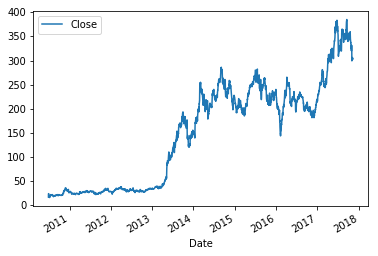

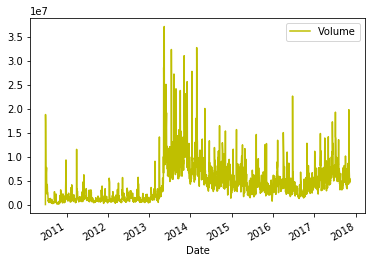

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def stock_graph(abb,comp_name):
    df = pd.read_csv('Data/Stocks/'+abb+'.us.txt', index_col='Date', parse_dates=True)
    dff = df.iloc[:]
    dff[['Close']].plot()
    dff[['Volume']].plot(color='y')

stock_graph('tsla', 'Tesla')

On June 29 2010, Tesla launched its IPO (Initial Public Offering) on NASDAQ exchange. They offered 13.3 mn shares at a cost of 17 dollars per share.

The graph above shows the stock of Tesla from year 2010 to 2017. Tesla's market saw an increase in the first quarter of 2013 after which in May of the same year, Tesla raised 1.02 bn dollars partially to repay the entire DOE loans. This is clearly visible from the second graph of volume which shows the number of shares of stock that traded hands corresponding to May 2013 opening price after the payment of loan.

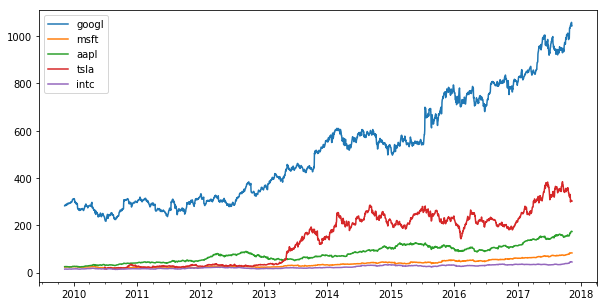

In [3]:
def mul_stocks_graph(abbs, dates):
    df = pd.DataFrame(index=dates)
    for abb in abbs:
        df_temp = pd.read_csv('Data/Stocks/'+abb+'.us.txt', index_col='Date',
                parse_dates=True, usecols=['Date', 'Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Close': abb})
        df = df.join(df_temp)
    return df

dates = pd.date_range('2009-11-10','2017-11-10',freq='B')
abbs = ['googl','msft','aapl','tsla','intc']
df = mul_stocks_graph(abbs, dates)
df.fillna(method='pad')
#print(df)
df.interpolate().plot(figsize=(10,5))
plt.show()

This graph is a visualization of how three tech giants have competeted thoroughout the years. Intel was left behind by Apple in March 2009. While Microsoft was competeting hard with Apple for the top share price when in 2010 Apple surpassed its rival. According to the historical data, Apple's market value rose to about 222 bn dollars while Microsoft ended with 219 bn dollars.

Apple sold 13.7 mn Macs. It was the largest number of sale by Apple in a year. 31 percent increase in Mac sales from the previous fiscal year can also be seen through this graph. 

On April 2 2014, Google created a new class of share to protect their super-voting power. If they would have simply doubled the shares the conventional way, it would dillute the voting power of the founders.

But this graphing method is wrong. It seems like Google stocks are much better to buy as apparently their growth rate is looking good, same goes for Tesla. By looking at high numbers, it misleads a human brain to think that such shares are worthy of buying. This is what Benjamin Graham says against of in his book. He says to invest in a business that has a visible growth. By normalizing the stock data, things would look entirely different. 

So if we rank companies using data above:
- googl
- tsla
- aapl
- msft
- intc

### Base value of stock from 2016 to 2018
This analysis shows how base price of each company compares with each other through years.

['googl', 'msft', 'aapl', 'tsla', 'intc']
[780.29, 57.32, 106.08, 185.35, 33.555]
[1044.15, 83.87, 174.67, 302.99, 45.58]
Percentage Increase
[0.33815633 0.46318911 0.64658748 0.63469112 0.35836686]


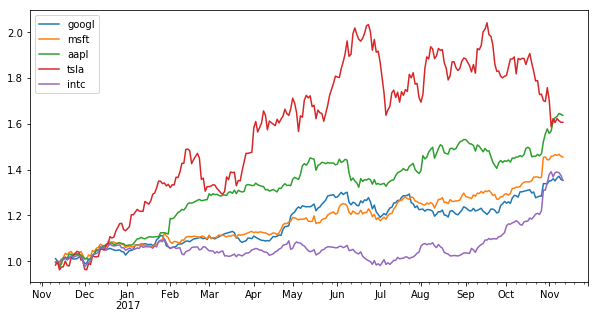

In [4]:
import numpy as np

dates = pd.date_range('2016-11-10','2017-11-10',freq='B')
abbs = ['googl','msft','aapl','tsla','intc']
df = mul_stocks_graph(abbs, dates)

close_prev, close_now = [], []
for i in range(0,len(abbs)):
    close_prev.append(df.iloc[0,:][i])
    close_now.append(df.iloc[-1,:][i])
    i+=1
  
print(abbs)
print(close_prev)
print(close_now)
np_close_prev = np.array(close_prev)
np_close_now = np.array(close_now)

print('Percentage Increase')
print((np_close_now - np_close_prev)/np_close_prev)

df = df/df.iloc[1,:]
#print(df[:2])
df.interpolate().plot(figsize=(10,5))
plt.show()

This graph above is the normalised version of the previous one. However, this visualization tells a much different story.
If by simply looking at this graph and rank the companies, it would be:
- aapl
- tsla
- msft
- intc
- googl

But there is still a problem. A prediction on which company would return the most cannot be made on the previous data which have a long duration in between. Yes, a relation can be seen when the stock increased or what might have happened when stock of a certain company increased. For example: Apple releasing iPhone 8 in September 2017 has made the stock go up, and iPhone X in November 2017 has done a similar job.

### Daily Returns
Now look at the daily returns of the Apple and Tesla. In order to clearly know what exactly is going on in a market on a daily basis we need to check the daily rate of return, maybe an iPhone is released or Tesla has done some innovation in research and development. A positive return means that stock has gained some value while negative return means otherwise.

Let's visualize the graphs for two companies and see what analysis can be made on them.

Daily Rate of Return 
                 tsla      aapl
2016-01-01       NaN       NaN
2016-01-04       NaN       NaN
2016-01-05 -0.000090  0.025838
2016-01-06  0.020042  0.019969
2016-01-07  0.015720  0.044068


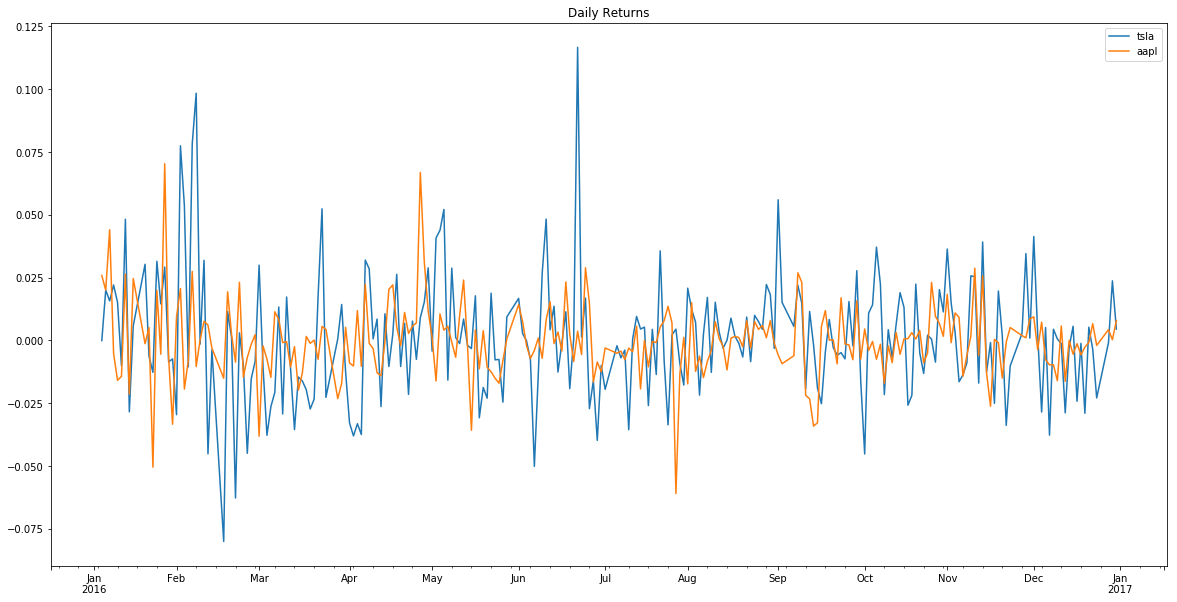

Daily Rate of Return 
                googl      gold
2016-01-01       NaN       NaN
2016-01-04       NaN       NaN
2016-01-05 -0.002744 -0.001595
2016-01-06  0.002897 -0.007928
2016-01-07  0.024737 -0.040452


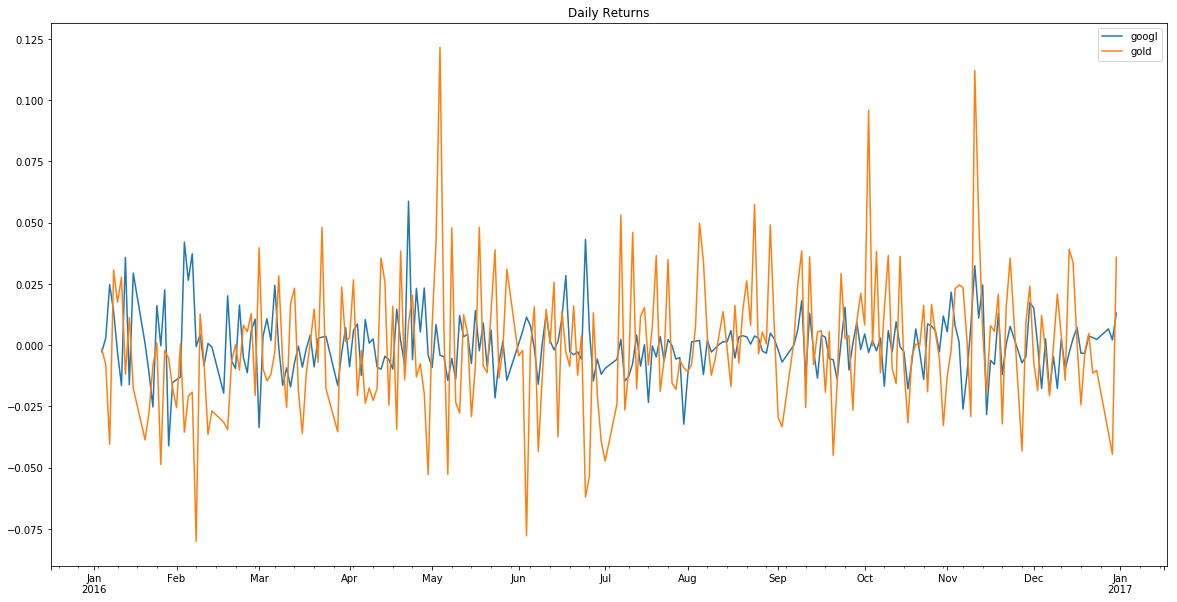

In [5]:
def daily_return(df):
    dr = df.copy()
    # (today_price-last_price)/last_price
    dr = dr.shift(1)/dr - 1
    return dr

dates = pd.date_range('2016-01-01','2016-12-31',freq='B')
abbs = ['tsla', 'aapl']
df = mul_stocks_graph(abbs, dates)
dr = daily_return(df)
print('Daily Rate of Return \n',dr[:5])
#dr = dr.interpolate()
dr.interpolate().plot(figsize=(20,10))
plt.title('Daily Returns')
plt.show()

abbs = ['googl', 'gold']
df = mul_stocks_graph(abbs, dates)
drg = daily_return(df)
print('Daily Rate of Return \n',drg[:5])
#drg = drg.interpolate()
drg.interpolate().plot(figsize=(20,10))
plt.title('Daily Returns')
plt.show()

By looking at the graph above, it is evident why Tesla is fluctuating the entire time. Tesla has been a hype these recent years. Whenever Elon Musk announces an innovation, it becomes an international sensation. Look at what happened on June 21 2016 when Tesla announced to buy Solar City. Market at that day saw an increase in Tesla's share.

If Apple is to be analysed, its market depends on their release of their brand new iPhone. On May 31 2016, as seen from graph, Apple daily return was increased because they released iPhone SE. But also Apple has seen a decline in the sales of their iPhone as seen on July 27 2016.

The Google has also seen spikes but not like Tesla and Apple. This makes investment in Tesla and Apple risky, and may give high returns or they may fall pretty low. See the garph for Tesla for an instance. Such stocks are more sensitive to news and information.

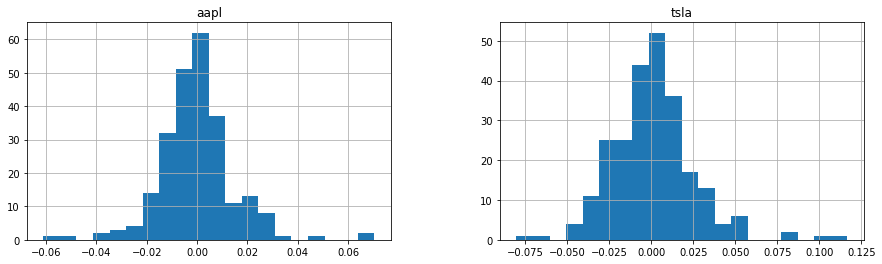

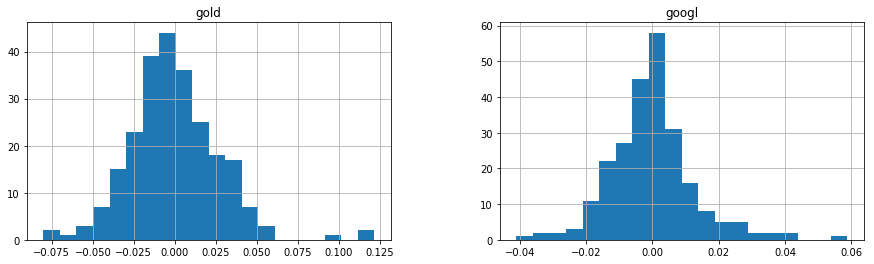

In [6]:
dr.hist(bins=20, figsize=(15,4))
drg.hist(bins=20, figsize=(15,4))
plt.show()

Knowing the frequency of days on which the certain positive returns were achieved is important to know. You will want to invest in a company that have smoother distribution over time, and doesn't have a huge difference between days. That is the reason why investing on gold is most the secure way for long term generation of wealth. Professional investors say that the more negative return or zero return a stock seems to give, the more secure it is.

### Cumulative Return
An investor needs to know how much in total has he earned in a certain period on time, mostly calculated annually. The visualization of cumulative return shows the performance of the stock over time.

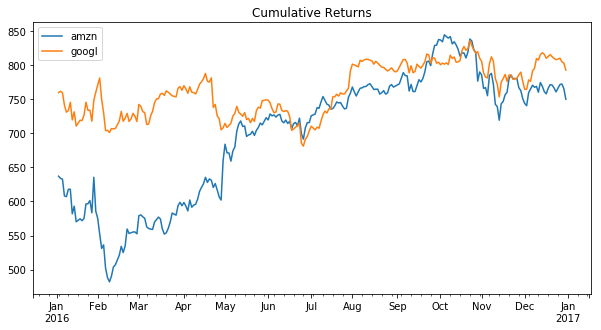

In [7]:
def cum_return(df):
    dr = df.copy()
    dr.cumsum()
    return dr

dates = pd.date_range('2016-01-01','2016-12-31',freq='B')
abbs = ['amzn','googl']
df = mul_stocks_graph(abbs, dates)
dr = cum_return(df)
dr.interpolate().plot(figsize=(10,5))
plt.title('Cumulative Returns')
plt.show()

The best company from the graph above in order to invest on is the Amazon. You started the year with 645 dollars and you ended with about 750 dollars which has a better return rate than Google as well.